## Scikit-Learn Introduction

## What we are going to cover in this Notebook:

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

## 0. An end-to-end Scikit-Learn workflow

## 1. Getting the data ready

In [1]:
# Get the data read

import pandas as pd

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# From the above data, we know that target column give us 1 and 0 values stating heart disease is there or not
# We will now create X (feature's matrix)

X = heart_disease.drop(labels = "target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [3]:
# Create labels i.e. the output/prediction to be done

y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## 2. Choose the right model and hyperparameters

In [4]:
# We will now instantiate the model
# We will be using a classifier model as we want to see if the values from one row equals to :
# one thing (yes, heart disease present) or
# other thing (no, heart disease not present)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We will keep the default parameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the training data and make predictions

In [5]:
# We will now split the data as training data and testing data

from sklearn.model_selection import train_test_split

# Splitting the test data to 20 percent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# We will now train the model by giving it training data input and training data output

clf.fit(X_train, y_train);

In [7]:
# We will now make predictions by creating a random dataset

import numpy as np

y_label = clf.predict(np.array([0,1,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
# From the above code we can understand that the predict function will take dataset which has the same shape as training 
# dataset to predict any values. So, we will now try with out test data.

X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2


In [10]:
y_preds = clf.predict(X_test)

y_preds

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [11]:
y_test

53     1
43     1
22     1
152    1
44     1
      ..
259    0
289    0
225    0
82     1
81     1
Name: target, Length: 61, dtype: int64

## 4. Evaluate the model 

In [12]:
# Let's try to evaluate the model on training data first

clf.score(X_train, y_train)

1.0

In [13]:
# As the model was trained on the training data then it will give us the maximum score possible

# We will now evaluate the model on test data

clf.score(X_test, y_test)

0.7704918032786885

In [14]:
# So, we are getting the accuracy of 80% here which is good

In [15]:
# Evaluating the model with other metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.71      0.77      0.74        26\n           1       0.82      0.77      0.79        35\n\n    accuracy                           0.77        61\n   macro avg       0.77      0.77      0.77        61\nweighted avg       0.77      0.77      0.77        61\n'

In [16]:
confusion_matrix(y_test, y_preds)

array([[20,  6],
       [ 8, 27]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds) # Same as score which we calculated earlier

0.7704918032786885

## Improve your model

In [18]:
# We will change the n_estimators parameter

for i in range(10, 110, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test data = {clf.score(X_test, y_test)*100:.2f}")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test data = 80.33
 
Trying model with 20 estimators...
Model accuracy on test data = 77.05
 
Trying model with 30 estimators...
Model accuracy on test data = 80.33
 
Trying model with 40 estimators...
Model accuracy on test data = 80.33
 
Trying model with 50 estimators...
Model accuracy on test data = 81.97
 
Trying model with 60 estimators...
Model accuracy on test data = 78.69
 
Trying model with 70 estimators...
Model accuracy on test data = 77.05
 
Trying model with 80 estimators...
Model accuracy on test data = 80.33
 
Trying model with 90 estimators...
Model accuracy on test data = 78.69
 
Trying model with 100 estimators...
Model accuracy on test data = 77.05
 


In [19]:
# By adjusting the above estimator values we understand that n_estimators = 50 or 60 will give us the most desirable result

## 6. Save the model and load it

In [20]:
# We will now save the model using pickle module

import pickle

# The model will be saved by referring to it as an object and then giving it a name and later mentioning it as a "wb" = write binary

pickle.dump(clf, open("random_forest_model_v1.pkl", "wb"))

In [21]:
# After executing the above code the model has been created and saved
# We will now try to load the saved model. "rb" = read binary

loaded_model = pickle.load(open("random_forest_model_v1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

In [22]:
# And we can see that thesame model with same score has been loaded

## 1. Getting our data ready to be used with Machine Learning

### Three main things we have to do:


1. Split the data into features and labels (usually 'X' and 'y')
2. Filling (also called imputing) or disregarding the missing values
3. Converting non - numerical values to numerical values (also called feature encoding)

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Let's form features

X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
# Let's form labels

y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [28]:
len(heart_disease)

303

In [29]:
len(heart_disease) * 0.8

242.4

### 1.1 Make sure it is all numerical

In [30]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [33]:
# Split data into X and y

X = car_sales.drop(["Price"], axis = 1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
y = car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [36]:
# Split into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [37]:
# Build Machine Learning Model

from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

## We will need to convert the categorical data into numeric format

In [38]:
# We will first import an encoding method

from sklearn.preprocessing import OneHotEncoder

# We will then import a transformation method which will transform the categorical data as per the encoding meethod

from sklearn.compose import ColumnTransformer

# We will now enlist the column names which have categorical values

categorical_features = ["Make", "Colour", "Doors"] # Even doors is a categorical value even though it is an integer value

# Instantiate encoder

one_hot = OneHotEncoder()

# We will now create a transformer and mention the encoding method and columns on which it needs to be applied

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough")

# From the above command we have tried to create a transformer.
# The transformer will be taking the type of transformation technique and the column names as a list of tuple
# It should use one hot encoding method and will use the object which we have instantiated
# Whatever apart from the categorical columns are there i.e. the remainder columns they should passthrough as it is
# In our case the Odometer column is the remainder column

transformed_X = transformer.fit_transform(X)

In [39]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
pd.DataFrame(transformed_X) # We will print the whole thing as a dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [41]:
# Instead of using one hot encoding we can replace the categorical column values as dummy variables using pandas

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
# We will now train our model on this transformed data

from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
X_train,  X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [43]:
# Build Machine Learning Model

from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.3235867221569877

In [44]:
# Instead of using one hot encoding we can replace the categorical column values as dummy variables using pandas

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
# dummies = pd.get_dummies(car_sales[["Make", "Colour"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
# The doors value is still numeric for some reason and not encoded

In [46]:
dummies["Odometer"] = car_sales["Odometer (KM)"]

In [47]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Odometer
0,4,0,1,0,0,0,0,0,0,1,35431
1,5,1,0,0,0,0,1,0,0,0,192714
2,4,0,1,0,0,0,0,0,0,1,84714
3,4,0,0,0,1,0,0,0,0,1,154365
4,3,0,0,1,0,0,1,0,0,0,181577
...,...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0,35820
996,3,0,0,1,0,0,0,0,0,1,155144
997,4,0,0,1,0,0,1,0,0,0,66604
998,4,0,1,0,0,0,0,0,0,1,215883


In [48]:
# We will now train our model on this transformed data

from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,  X_test, y_train, y_test = train_test_split(dummies, y, test_size=0.2)

In [49]:
# Build Machine Learning Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3219620934706694

In [50]:
# The slight difference is probably because for dummies the foors value did not get encoded

In [51]:
dummies = pd.get_dummies(car_sales[["Make", "Colour"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0
996,0,0,1,0,0,0,0,0,1
997,0,0,1,0,0,1,0,0,0
998,0,1,0,0,0,0,0,0,1


In [52]:
dummies_1 = pd.get_dummies(car_sales.Doors.astype(str))
dummies_1

,3,4,5
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
995,0,1,0
996,1,0,0
997,0,1,0
998,0,1,0


In [53]:
X_using_dummies = pd.concat([dummies, dummies_1], axis=1)
X_using_dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,3,4,5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [54]:
X_using_dummies["Odometer"] = car_sales["Odometer (KM)"]
X_using_dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,3,4,5,Odometer
0,0,1,0,0,0,0,0,0,1,0,1,0,35431
1,1,0,0,0,0,1,0,0,0,0,0,1,192714
2,0,1,0,0,0,0,0,0,1,0,1,0,84714
3,0,0,0,1,0,0,0,0,1,0,1,0,154365
4,0,0,1,0,0,1,0,0,0,1,0,0,181577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0,35820
996,0,0,1,0,0,0,0,0,1,1,0,0,155144
997,0,0,1,0,0,1,0,0,0,0,1,0,66604
998,0,1,0,0,0,0,0,0,1,0,1,0,215883


In [55]:
# We will now train our model on this transformed data

from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,  X_test, y_train, y_test = train_test_split(X_using_dummies, y, test_size=0.2)

In [56]:
# Build Machine Learning Model

from sklearn.ensemble import RandomForestRegressor

model_using_dummies = RandomForestRegressor()
model_using_dummies.fit(X_train, y_train)
model_using_dummies.score(X_test, y_test)

0.3235867221569877

In [57]:
clf.score(X_test, y_test)

0.3235867221569877

In [58]:
# The score using both dummies and hot encoding is the same

### 1.2 Handling Data with missing values

1. Fill them with some value (also called as Imputation).
2. Remove the samples with missing data altogether.

In [59]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
car_sales_missing.isna().sum() # To find the amount of missing data in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1 - Fill missing data with Pandas

In [61]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("Missing", inplace = True)
car_sales_missing["Make"].isna().sum()

0

In [62]:
car_sales_missing["Make"]

0        Honda
1          BMW
2        Honda
3       Toyota
4       Nissan
        ...   
995     Toyota
996    Missing
997     Nissan
998      Honda
999     Toyota
Name: Make, Length: 1000, dtype: object

In [63]:
# Fill the "Colour" column

car_sales_missing["Colour"].fillna("Missing", inplace = True)
car_sales_missing["Colour"].isna().sum()

0

In [64]:
# Fill the Odometer column with the mean value of the column. Usually for numeric values we can take mean.

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Odometer (KM)"].isna().sum()

0

In [65]:
# For doors we will firstly try to think that which is the highest value

car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [66]:
# So, we consider replacing 4 as the value for the missing data

# Fill the Doors column with the value 4

car_sales_missing["Doors"].fillna(4, inplace = True)
car_sales_missing["Doors"].isna().sum()

0

In [67]:
# Now for the values missing in Price column, there's no point of keeping those rows if we do not have the price 
# So we will drop those rows where it is NaN i.e. rows where price value is null

# car_sales_missing.dropna(inplace = True) # Drop all the rows which have null values
car_sales_missing.dropna(subset=["Price"], inplace = True) # subset will take the name of column names in list format
car_sales_missing["Price"].isna().sum()

0

In [68]:
len(car_sales_missing) # We can observe the 50 values have reduced as 50 rows have been dropped where price was null

950

In [69]:
# We will split the data

X = car_sales_missing.drop(["Price"], axis = 1)
y = car_sales_missing["Price"]

In [70]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [71]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [72]:
# Let's transform the data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

# transformer = ColumnTransformer((["one_hot",
#                                   one_hot,
#                                   categorical_features]),
#                                   remainder="passthrough")

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough")

In [73]:
transformed_X = transformer.fit_transform(X_try)
transformed_X

NameError: name 'X_try' is not defined

In [74]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [75]:
# The above data is in compressed sparse row format and this will not allow us to split the data properly
# It is transformed into this format as the value 0 is coming more often than any value other than 0
# So, the value which is non zero is plotted by giving the coordinate values where there is non zero value
# This is a compression technique
# Check the link - https://www.javatpoint.com/sparse-matrix#:~:text=Sparse%20matrices%20are%20those%20matrices,than%20the%20non%2Dzero%20elements.
# But we don't need this data in sparse matrix format but in normal dataframe
# So we will need to change the default sparse_threshold value of 0.3 to 0

In [76]:
# We will first import an encoding method

from sklearn.preprocessing import OneHotEncoder

# We will then import a transformation method which will transform the categorical data as per the encoding meethod

from sklearn.compose import ColumnTransformer

# We will now enlist the column names which have categorical values

categorical_features = ["Make", "Colour", "Doors"] # Even doors is a categorical value even though it is an integer value

# Instantiate encoder

one_hot = OneHotEncoder()

# We will now create a transformer and mention the encoding method and columns on which it needs to be applied

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough",
                                sparse_threshold=0)

# From the above command we have tried to create a transformer.
# The transformer will be taking the type of transformation technique and the column names as a list of tuple
# It should use one hot encoding method and will use the object which we have instantiated
# Whatever apart from the categorical columns are there i.e. the remainder columns they should passthrough as it is
# In our case the Odometer column is the remainder column

transformed_X = transformer.fit_transform(X)

In [77]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [78]:
# Reminder to split the data before filling and transforming the data
# Do not use reference of test data to fill in training data

### Option 2 - Using Scikit-Learn to impute the data

In [79]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [80]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [81]:
# We will remove the null values which were in Price column

car_sales_missing.dropna(subset=["Price"], inplace=True)

In [82]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [83]:
# Split X and y

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [84]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [85]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [86]:
# Importing the imputer from scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
# You are basically instantiating an imputer which will impute a constant value and that fill value will be "Missing"

door_imputer = SimpleImputer(strategy="constant", fill_value=4)

num_imputer = SimpleImputer(strategy="mean")

# Now we will define the columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer which will now fill the missing values

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [87]:
# Now we will create the data frame

car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [88]:
# We will verify if the data is filled or not

car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [89]:
# We will first import an encoding method

from sklearn.preprocessing import OneHotEncoder

# We will then import a transformation method which will transform the categorical data as per the encoding meethod

from sklearn.compose import ColumnTransformer

# We will now enlist the column names which have categorical values

categorical_features = ["Make", "Colour", "Doors"] # Even doors is a categorical value even though it is an integer value

# Instantiate encoder

one_hot = OneHotEncoder()

# We will now create a transformer and mention the encoding method and columns on which it needs to be applied

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder = "passthrough",
                                sparse_threshold=0)

# From the above command we have tried to create a transformer.
# The transformer will be taking the type of transformation technique and the column names as a list of tuple
# It should use one hot encoding method and will use the object which we have instantiated
# Whatever apart from the categorical columns are there i.e. the remainder columns they should passthrough as it is
# In our case the Odometer column is the remainder column

transformed_X = transformer.fit_transform(car_sales_filled)

In [90]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [91]:
# We have the filled data encoded
# Let's fit the model

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2221112515179916

In [92]:
# For car sales model the score was higher
# And that would be because the data was more in the car_sales dataset than the car_sales_missing

(len(car_sales), len(car_sales_filled))

(1000, 950)

## 2. Choosing the right algorithm/estimator for our problem

Scikit-Learn uses estimator as another word for machine learning algorithm or model.

* Classification - Predicting whether a sample is one thing or another.
* Regression - Predicitng a number.

### 2.1 Picking a machine learning model for a regression problem

In [93]:
# Import Boston Housing Dataset

from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [94]:
# The boston dataset is in dictionary format

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [95]:
boston["data"].shape

(506, 13)

In [96]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [97]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [98]:
# We will now convert the dataset correctly into the Dataframe

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
# We have imported all the features now let's import the label i.e. the target column

boston_df["target"] = boston["target"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [100]:
# Referring to the Scikit-Learn Estimator map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# How many samples?

len(boston_df)

506

In [101]:
# As we will be predicitng the target price, less than 100K samples and we are not sure if there are important features
# We will be choosing Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168522

How do we improve the score?

What if Ridge wasn't working?

In [102]:
# As per the Scikit-Learn Map, we will try to implement ensemble methods. We will try to implement Random Forest.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                  test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8654448653350507

## 2.2 Choosing an estimator for Classification Problem

Let's go to the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [103]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
len(heart_disease)

303

In [105]:
# As per the Scikit-Learn map we will now try Linear SVC

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

svc_model = SVC()

svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.7049180327868853

In [106]:
# The score isn't that great so we will try to use some other model.

### Tidbit :

1. For structured data, use ensemble methods.
2. For unstructured data, use deep learning or transfer learning.

In [107]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data

Different names for :

* `X` - data, features, feature variables
* `y` - labels, targets, target variables, ground truth

In [108]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [109]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [110]:
# Use a trained model to make predictions

y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [111]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [112]:
np.mean(y_preds == y_test)

0.8360655737704918

In [113]:
clf.score(X_test, y_test)

0.8360655737704918

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8360655737704918

In [115]:
# All the above commands mean the same thing i.e. to find the accuracy of the model

Make predictions with `predict_proba()`

In [116]:
# predict_proba() returns the probability of each class

clf.predict_proba(X_test[:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [117]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [118]:
# We can understand that for 1st feature - 95% probability that the patient will not have heart disease
# For the 2nd feature - 62% probability that the patient will have a heart disease
# These probabilities help us understand if we want to consider those samples for deciding that class or not
# For predicting medical results we might want to consider higher probabilities only and not less than 80%
# In those cases, predict_proba() is very useful

In [119]:
# Predict values for a regression model

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Load the data

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [120]:
model.predict(X_test[:5])

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [121]:
np.array(y_test[:5])

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [122]:
# We now have the predicted the values and the actual results
# We will evaluate these results using mean absolute error - mean of the absolute difference between the predicted and actual values
# Formula = (|y_preds - y_test|)/n

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

## 4. Evaluating a Machine Learning Model

Three ways to evaluate Scikit-Learn models/estimators

1. Estimator `score` model.
2. The `scoring` parameter.
3. Problem-specific metric functions.

In [123]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [124]:
# For classifier the score means - Return the mean accuracy on the given test data and labels.

In [125]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

In [126]:
# For regression the score means - Return the coefficient of determination :math:`R^2` of the prediction.

In [127]:
# So, score which is a default method will have different ways to score the model based on the type of problem we are solving
# For Regression the score is different and for Classifier it is different.

### 4.2 Evaluating a model using the `scoring` parameter

In [128]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [129]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [130]:
# Cross Validation helps to avoid us getting lucky with the way data was divided
# It calculates score by splitting the data in different combinations with the 80-20 ratio or whatever ratio we have passed
# i.e. model is trained in different versions of training data and evaluated on different versions of test data
# By default it will do 5 versions and we can see list of 5 items returned which are scores of those data versions

In [131]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [132]:
# By changing value of cv, we are changing the number of combinations we want

In [133]:
# The scoring parameter by default is 'None' so the the metric which is used in score() for that model will be used here

# We will take the score of the model
clf_single_score = clf.score(X_test, y_test)

# We will take the mean of the 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# We will now compare the two scores
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8281420765027322)

In [134]:
# We prefer cross validation score

### 4.2.1 Classification Model Evaluation Metrics

1. Accuracy
2. Area under ROC
3. Confusion Matrix
4. Classification Report

#### Accuracy

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
np.mean(cross_val_score)

0.8248087431693989

In [137]:
print(f"Heart Disease Classifier Cross Valiated Accuracy: {(np.mean(cross_val_score)) *100 :.2f}%")

Heart Disease Classifier Cross Valiated Accuracy: 82.48%


In [138]:
# So basically our model has the accuracy of 82% as per the data provided to us. 8/10 times it will predict right answer.

**Area under the receiver operation characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative - model predicts 0 when truth is 1

In [139]:
# Create X_test... etc

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [140]:
from sklearn.metrics import roc_curve

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [141]:
# Now we know the probabilities of the model predicting the class as 0 and 1
# We will now take all the probabilities which predict the value as 1

y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [142]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

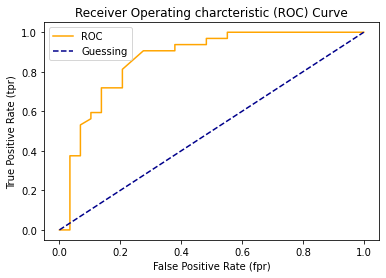

In [143]:
# Creating a function to plot ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the False Positive Rate (FPR)
    and True Positive Rate (TPR) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle='--', label = 'Guessing')
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating charcteristic (ROC) Curve")
    plt.legend()
    plt.show()
 
plot_roc_curve(fpr, tpr)

In [144]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

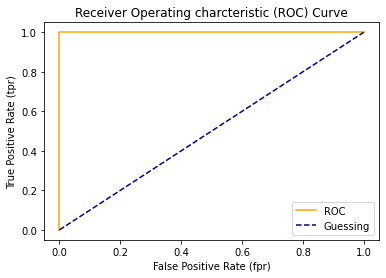

In [145]:
# Plot perfect roc curve and auc score

fpr, tpr, threshold = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [146]:
roc_auc_score(y_test, y_test)

1.0

In [147]:
# 1.0 is the ideal score and curve area
# which means the classifier predicts the 0 as 0 and 1 as 1
# 0.5 means classifier does not predict correctly
# 0.0 means it predicts 1 as 0 and 0 as 1

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [148]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [149]:
# Visualize confusion matrix using pd.crosstab()

pd.crosstab(y_test, 
            y_preds,
           rownames = ['True Values'],
           colnames = ['Predicted Values'])

Predicted Values,0,1
True Values,,
0,23,6
1,6,26


In [150]:
20+9+8+24

61

In [151]:
len(y_test)

61

In [152]:
# To install any library using Jupyter

import sys
!conda install --yes --prefix {sys.prefix} seaborn

^C


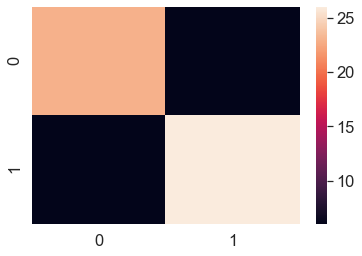

In [153]:
# Make our confusion matrix more visual with Seaborn

import seaborn as sns

# Set the fontscale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

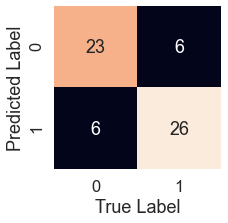

In [154]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat data
                    cbar=False)
    
#     plt.xlabel("True Label")
#     plt.ylabel("Predicted Label");
    ax.set(xlabel = "True Label",
          ylabel = "Predicted Label")
    
plot_conf_mat(conf_mat)

**Classification Report**

In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [156]:
# Precision : Model which has no false positives has 1.0 precision
# Recall : Model which has no false negatives has 1.0 recall
# F-1 score : Calculated by considering both precision and recall
# Support : How many samples considered from the y_test to evaluate the metrics
# Accuracy : Perfect model has 1.0 accuracy
# Macro Avg : Macro Average. Problematic for imbalanced classes
# Weighted Avg : Gives weight based on number of samples

In [157]:
# Read this article : https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

In [158]:
# Now why do we need these metrics?
# Consider the dataset which has imbalanced number of classes

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [159]:
# From the above report we understand that the precision to predict class 1 is 0 of our model
# In this way these matrices can be helpful

### 4.2.2 Regression Model Evaluation Metrics

1. R^2 (Pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

Compares your model with the mean of the targets. Values can range from negative infinity (poor model) to 1.
For example, if all your model predicts mean of the targets, its R^2 will be 0.
And if your model predicts all the target values correctly then its R^2 will be 1.

In [160]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [162]:
model.score(X_test, y_test)

0.8654448653350507

In [163]:
y_preds = model.predict(X_test)

In [164]:
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)

0.8654448653350507

In [165]:
y_preds_mean = np.full(len(y_test), y_test.mean())

In [166]:
y_test.mean(), y_preds_mean

(21.488235294117654,
 array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.488235

In [167]:
r2_score(y_test, y_preds_mean) # Close to 0. It is because of the decimal points we still see some values.

2.220446049250313e-16

In [168]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. 
It gives you an idea of how wrong your model's predictions are.

In [169]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [170]:
df = pd.DataFrame({"actual_values" : y_test,
                 "predicted_values" : y_preds})
df

,actual_values,predicted_values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [171]:
df["differences"] = df["actual_values"] - df["predicted_values"]
df

,actual_values,predicted_values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [172]:
# Calculating MAE by hand

absolute_values = np.abs(df["differences"])
absolute_values.mean()

2.136382352941176

**Mean Squared Error (MSE)**

In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [174]:
# Calculating MSE by hand

squared = np.square(df["differences"])
np.mean(squared)

9.867437068627439

In [175]:
# Minimize MSE and MAE. Maximize R^2.

## 5 Improving a model

First predictions = baseline predictions. 
First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?
* From a model perspective:

Is there a better model we could use?
* Could we improve the current model?
* Hyperparameters vs. Parameters

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [177]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 By Hand

Let's make 3 sets, training, validation and test.

In [178]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `n_estimators`

In [193]:
import sklearn.metrics
from sklearn.metrics import precision_score # installing it separately because it is giving issues
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [180]:
# Since we are going to tune hyperparameters by hand then we need to split the data into train, validation and test set
# train_test_split only divides between train and test
# So, we will manually split the data from our dataframe

from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

# Shuffle the data so that it is not in the same order as it was stored

heart_disease_shuffled = heart_disease.sample(frac=1) #frac=1 means shuffling 100% of data

# Split into X and y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation and test

train_split = round(0.7 * len(heart_disease_shuffled)) # getting the 70% of data
valid_split = round(train_split + (0.15 * len(heart_disease_shuffled))) # getting the 15% of data


X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split : valid_split], y[train_split : valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [181]:
clf = RandomForestClassifier()

clf.get_params() #baseline parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [195]:
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [197]:
# Tuning the `max_depth` hyperparameter

clf_2 = RandomForestClassifier(max_depth=10)

clf.fit(X_train, y_train)

y_preds_2 = clf.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [198]:
# It's the same. No change as such.

### 5.2 Hyperparameter tuning using RandomizedSearchCV

In [201]:
from sklearn.model_selection import RandomizedSearchCV

# Mention the hyperparameters and the values which you want to use

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
       "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6],
       "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# Split into X and y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the RandomForestClassifier

clf = RandomForestClassifier(n_jobs = 1) # We are deciding how much of the computing power we are going to use. 1 = 100%

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 10, # number of model's combination
                           cv = 5, # Cross validation set up
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [202]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [204]:
# Make predictions with the best parameters

rs_y_preds = rs_clf.predict(X_test)

In [205]:
# Evaluate the predictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [206]:
# It is lesser than of the one which we tuned by hand.
# So,it is not necessary that the RandomizedSearchCV will give you the best results, but you should give it a try

### 5.3 Hyperparameter tuning using GridSearchCV

In [207]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [208]:
6*5*2*3*3

540

In [209]:
540*5 # 5 because of the cross validation

2700

In [210]:
# So,at random around 2700 models could be created with these combinations
# We will narrow down our grid and then applybrute force to get the most accurate model

In [211]:
grid_2 = {"n_estimators" : [100, 200, 500],
       "max_depth" : [None],
       "max_features" : ["auto", "sqrt"],
       "min_samples_split" : [6],
       "min_samples_leaf" : [1, 2]}

In [212]:
3*1*2*1*2

12

In [213]:
12*5 # 5 because of the cross validation

60

In [229]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the GridForestClassifier

clf = RandomForestClassifier(n_jobs = 1) # We are deciding how much of the computing power we are going to use. 1 = 100%

# Setup GridSearchCV

gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5, # Cross validation set up
                           verbose = 2)

# Fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [217]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [218]:
gs_y_preds = gs_clf.predict(X_test)

In [219]:
# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different model's metrics.

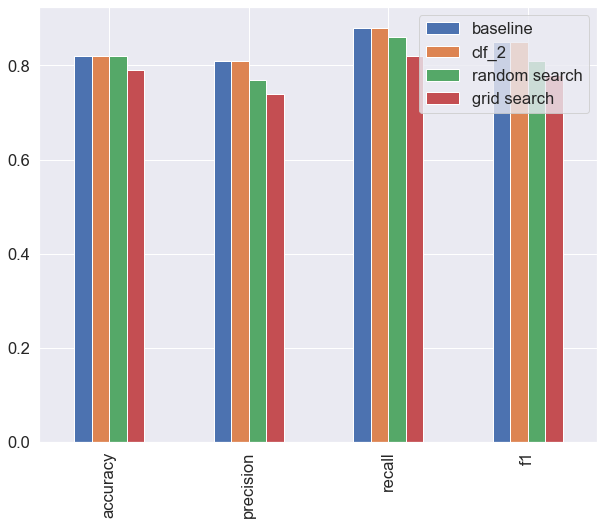

In [225]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                               "clf_2" : clf_2_metrics,
                               "random search" : rs_metrics,
                               "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
    
1. With Python's `pickle` module
2. With `joblib` module

**Pickle**

In [234]:
import pickle

# Saving an existing model to file
pickle.dump(gs_clf, open("pickle_random_forest_model_1.pkl", "wb"))

In [235]:
# Load a saved model
loaded_pickle_model = pickle.load(open("pickle_random_forest_model_1.pkl", "rb"))

In [236]:
# Make predictions with loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [237]:
from joblib import dump,load

# Saving model into a file
dump(gs_clf, filename="joblib_random_forest_model_1.joblib")

['joblib_random_forest_model_1.joblib']

In [238]:
# Import a saved joblib model
loaded_joblib_model = load(filename="joblib_random_forest_model_1.joblib")

In [240]:
# Make predictions with loaded model
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [241]:
# For models with a lot of data itis preferable to use joblib rather than pickle

## 7. Putting it all together!

In [242]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [245]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [246]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell)

1. Fill the missing data
2. Convert the data into numeric values
3. Build a model on the data

In [247]:
# We will be using the Pipeline class by Scikit Learn to build a Pipeline
# When building a pipeline of the steps we need to create a list of the tuples which will have steps in it

In [252]:
# Importing the Pipeline class
from sklearn.pipeline import Pipeline

# Getting data ready
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace = True) # Drop the rows where there is anempty fieldin the Price column

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing values")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

num_features = ["Odometer (KM)"]
num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers = [
                ("cat", categorical_transformer, categorical_features),
                ("door", door_transformer, door_features),
                ("num", num_transformer, num_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [253]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" : ["mean", "median"],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing '
                                                                                                                   'values',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                   

In [254]:
gs_model.score(X_test, y_test)

0.3339554263158365